# Starting with dowhy for Causality inference analysis


In [50]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
# from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


In [51]:
CSV_PATH = "../data.csv"

In [52]:
def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [53]:
df = read_proccessed_data(CSV_PATH)

file read as csv


In [54]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
treatment_name = []
outcome_name = 'y'
graph = d["gml_graph"]

In [83]:
model = CausalModel(
    data = df,
    treatment = treatment_name,
    outcome = outcome_name,
    graph = graph
)

In [85]:
d["gml_graph"]

'graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

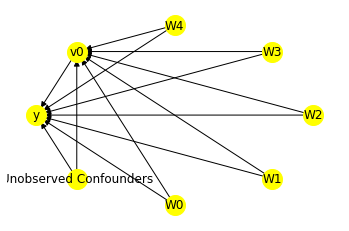

In [84]:
model.view_model(layout = "dot")

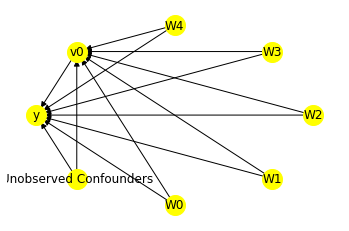

In [14]:
model.view_model(layout = "dot")

ModuleNotFoundError: No module named 'ipython'

In [32]:
!pip install IPython

In [46]:
from IPython.display import Image, display

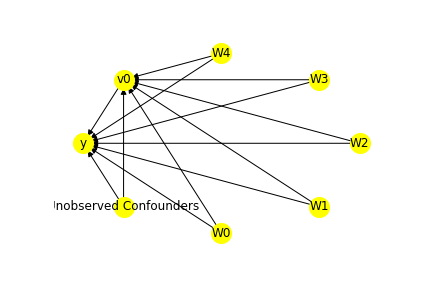

In [47]:
display(Image(filename = "causal_model.png"))

In [48]:
identified_estimand = model.identify_effect()
print(identified_estimand)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                  
─────(Expectation(y))
d[v₀]                
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,,U) = P(y|v0,)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [49]:
estimate = model.estimate_effect(identified_estimand,method_name = "backdoor.linear_regression")

KeyError: "None of [Index(['v0'], dtype='object')] are in the [columns]"

In [6]:
from dowhy import CausalModel
import dowhy.datasets as ds
import pandas as pd

In [7]:
dir(ds)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'choice',
 'construct_col_names',
 'convert_to_categorical',
 'create_dot_graph',
 'create_gml_graph',
 'linear_dataset',
 'math',
 'np',
 'pd',
 'sigmoid',
 'simple_iv_dataset',
 'stochastically_convert_to_binary',
 'xy_dataset']

In [8]:
d = ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

In [162]:
d["treatment_name"],

(['v0'],)

In [163]:
d["outcome_name"],

('y',)

In [165]:
d["gml_graph"]

'graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

In [166]:
ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

{'df':             W0        W1        W2        W3        W4     v0         y
 0    -1.638785  0.272547 -1.263136 -0.259484 -0.805099  False -4.541796
 1    -1.414638 -0.697046 -0.928133  2.499879  1.139186  False -1.794976
 2    -0.335127 -0.198696  1.545509  1.565246  2.146495   True  9.058506
 3     1.063119 -1.631308 -1.197662 -1.831989  0.194316  False -5.778594
 4     0.066333  0.135952  0.200458 -0.806481  0.162068  False -0.155995
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -2.833685  0.071858  3.042857 -0.326853  3.335355   True  6.260940
 9996 -3.117026 -0.674629 -0.193882 -0.979698  1.036485  False -7.445412
 9997 -2.270515 -1.386371 -0.198742 -0.090250 -0.793971  False -7.433279
 9998  0.076325 -1.942490 -0.903228 -0.490455  1.537504   True -0.494056
 9999 -3.038669 -0.040139  1.126660  0.610897  0.029426  False -2.503612
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0', 'W1', 'W2

In [128]:
data = list(ds.np)
df =pd.DataFrame(data=ds.__loader__)

TypeError: 'module' object is not iterable

In [ ]:
df.

In [100]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [101]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
